In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import plotly
from IPython.display import display
from IPython.display import Image
import numpy as np
import warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math
import plotly
from operator import truediv

### Uploading My Data

The following is just to load in my cleaned dataset for Education Level from the Initial_Exploration_and_Cleaning folder.


In [2]:
education=gpd.read_file('../../data/Raw_Data/Education files/SimplyAnalytics_Shapefiles_2019-12-13_18_56_17_ccc5dd5279b84a232c60ea1bb5cf8519.shp')
education=education[['spatial_id', 'VALUE0', 'geometry']]
education.columns = ['zipcode', 'Education Level', 'Geometry']
education.head()

,zipcode,Education Level,Geometry
0,19102,2890.0,POLYGON ((-75.16728099999999 39.95825899907105...
1,19103,12146.0,POLYGON ((-75.18090899999999 39.95298199907108...
2,19104,6592.0,POLYGON ((-75.21206899999999 39.97021099907098...
3,19106,5821.0,(POLYGON ((-75.14433099999998 39.9298249990712...
4,19107,11420.0,POLYGON ((-75.16402299999997 39.95162799907109...


The following is just to load in my cleaned combined dataset for diabetes and income from the Income and Diabetes Correlation notebook in my Deeper_Analysis notebook. 


In [3]:
diabetes2_geo_df=gpd.read_file('/Commjhub/jupyterhub/comm318_fall2019/alidadig/COMM318_Final_Project/data/Raw_Data/Diabetes files/SimplyAnalytics_Shapefiles_2019-12-04_03_12_54_d74b88e522bf3f67df6cb463b492384f.shp')
diabetes2_geo_df=diabetes2_geo_df[['spatial_id', 'VALUE0', 'geometry']]
diabetes2_geo_df.columns = ['zipcode', 'Counts Diabetes', 'Geometry']
income_geo_df=gpd.read_file('/Commjhub/jupyterhub/comm318_fall2019/alidadig/COMM318_Final_Project/data/Raw_Data/Income files/SimplyAnalytics_Shapefiles_2019-12-03_05_13_16_89807a0551dabf581fad0dc3275f5cf9.shp')
cleaned_income_df=income_geo_df[['spatial_id', 'VALUE0', 'geometry']]
cleaned_income_df.columns = ['Zipcode', 'Median Income', 'geometry']
Income_Diabetes=pd.concat([cleaned_income_df, diabetes2_geo_df], axis=1)
Income_Diabetes=Income_Diabetes[['Zipcode', 'Median Income', 'Counts Diabetes', 'geometry']]
Income_Diabetes.head()

,Zipcode,Median Income,Counts Diabetes,geometry
0,19102,84800.0,0.0000,POLYGON ((-75.16728099999999 39.95825899907105...
1,19103,78933.0,0.5980,POLYGON ((-75.18090899999999 39.95298199907108...
2,19104,27647.0,0.6768,POLYGON ((-75.21206899999999 39.97021099907098...
3,19106,112116.0,0.9344,(POLYGON ((-75.14433099999998 39.9298249990712...
4,19107,63548.0,3.4211,POLYGON ((-75.16402299999997 39.95162799907109...


### Merging My Data

Now, I want to combine the education dataset with the combined dataset for income and diabetes counts. The two datasets align perfectly by zipcode so I don't need to reorder the education level and income_diabetes dataset columns in order to merge them accurately. The Income_Diabetes_Education dataframe will be my combined dataset for median income level, diabetes counts, and education level for each zipcode. 

In [4]:
Income_Diabetes_Education=pd.concat([Income_Diabetes, education], axis=1)
Income_Diabetes_Education.head()

,Zipcode,Median Income,Counts Diabetes,geometry,zipcode,Education Level,Geometry
0,19102,84800.0,0.0000,POLYGON ((-75.16728099999999 39.95825899907105...,19102,2890.0,POLYGON ((-75.16728099999999 39.95825899907105...
1,19103,78933.0,0.5980,POLYGON ((-75.18090899999999 39.95298199907108...,19103,12146.0,POLYGON ((-75.18090899999999 39.95298199907108...
2,19104,27647.0,0.6768,POLYGON ((-75.21206899999999 39.97021099907098...,19104,6592.0,POLYGON ((-75.21206899999999 39.97021099907098...
3,19106,112116.0,0.9344,(POLYGON ((-75.14433099999998 39.9298249990712...,19106,5821.0,(POLYGON ((-75.14433099999998 39.9298249990712...
4,19107,63548.0,3.4211,POLYGON ((-75.16402299999997 39.95162799907109...,19107,11420.0,POLYGON ((-75.16402299999997 39.95162799907109...


Now, I will rename the columns so they are easier to read and only have 1 geometry and zipcode column. 

In [5]:
Income_Diabetes_Education=Income_Diabetes_Education[['Zipcode', 'Median Income', 'Counts Diabetes', 'Education Level', 'geometry']]
Income_Diabetes_Education.head()

,Zipcode,Median Income,Counts Diabetes,Education Level,geometry
0,19102,84800.0,0.0000,2890.0,POLYGON ((-75.16728099999999 39.95825899907105...
1,19103,78933.0,0.5980,12146.0,POLYGON ((-75.18090899999999 39.95298199907108...
2,19104,27647.0,0.6768,6592.0,POLYGON ((-75.21206899999999 39.97021099907098...
3,19106,112116.0,0.9344,5821.0,(POLYGON ((-75.14433099999998 39.9298249990712...
4,19107,63548.0,3.4211,11420.0,POLYGON ((-75.16402299999997 39.95162799907109...


### Graphing My Merged Data

I now want to graph the merged dataset by plotting Counts Diabetes and Median Income with Education level to see the correlation. 

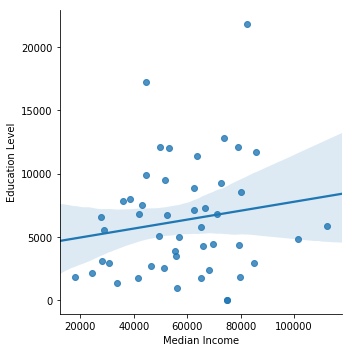

In [6]:
fig2 = sns.lmplot(x='Median Income', y='Education Level', data=Income_Diabetes_Education)

In [7]:
fig2.savefig("Income Diabetes Education Graph.png")

In [8]:
fig = px.scatter(Income_Diabetes_Education,x='Median Income', y='Counts Diabetes', 
           color='Zipcode', 
           size="Education Level", size_max=50,
           hover_name="Zipcode"
          )

In [9]:
plotly.io.write_html(fig, file='Income Diabetes Education Level.html')

The above saves my figure as html for my final presentation.

### About This Data

 As income increases and diabetes counts decreases, the size of the bubbles grew much larger. 
Education level is a much stronger link between lower income and higher diabetes than access to heatlhy food stores is.